In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

### STATIONS:

In [2]:
# path = "./Dataset/QCLCD201301/"
path = "assets/data/dataset_completo/QCLCD201301/"
file = "201301station.txt"
df_stations = pd.read_csv(path+file, sep="|")
df_stations.head()

,WBAN,WMO,CallSign,ClimateDivisionCode,ClimateDivisionStateCode,ClimateDivisionStationCode,Name,State,Location,Latitude,Longitude,GroundHeight,StationHeight,Barometer,TimeZone
0,3011,NaN,TEX,NaN,5.0,NaN,TELLURIDE,CO,TELLURIDE REGIONAL AIRPORT,37.95000,-107.90000,9091.0,9078.0,NaN,-7
1,3012,NaN,SKX,NaN,29.0,NaN,TAOS,NM,TAOS REGIONAL AIRPORT,36.45000,-105.66667,7091.0,7091.0,NaN,-7
2,3013,NaN,LAA,NaN,5.0,NaN,LAMAR,CO,LAMAR MUNICIPAL AIRPORT,38.07000,-102.68806,3704.0,3703.0,3675.0,-7
3,3014,NaN,4SL,2.0,29.0,9031.0,TORREON,NM,TORREON,35.79910,-107.18130,6700.0,6909.0,0.0,-7
4,3016,NaN,RIL,2.0,5.0,7034.0,RIFLE,CO,GARFIELD CO REGIONAL ARPT,39.52778,-107.71972,5522.0,5544.0,5506.0,-7


In [3]:
df_stations.columns

Index(['WBAN', 'WMO', 'CallSign', 'ClimateDivisionCode',
       'ClimateDivisionStateCode', 'ClimateDivisionStationCode', 'Name',
       'State', 'Location', 'Latitude', 'Longitude', 'GroundHeight',
       'StationHeight', 'Barometer', 'TimeZone'],
      dtype='object')

In [4]:
columns = ['WBAN',  'Name', 'State', 'Location', 
           'Latitude', 'Longitude', 'StationHeight', 
           'Barometer', 'TimeZone']

In [5]:
print("Prima -->", df_stations.shape)
df_stations = df_stations[columns]
print("Dopo -->", df_stations.shape)

Prima --> (2119, 15)
Dopo --> (2119, 9)


In [6]:
# hg to hPa
df_stations['Barometer'] = np.where(df_stations['Barometer'].notnull(), (df_stations['Barometer'].astype(float) * 33.8639).round(2), df_stations['Barometer'].astype(float))

# foot to meter
df_stations['StationHeight'] = np.where(df_stations['StationHeight'].notnull(), (df_stations['StationHeight'].astype(float) * 0.3048).round(2), df_stations['StationHeight'].astype(float))

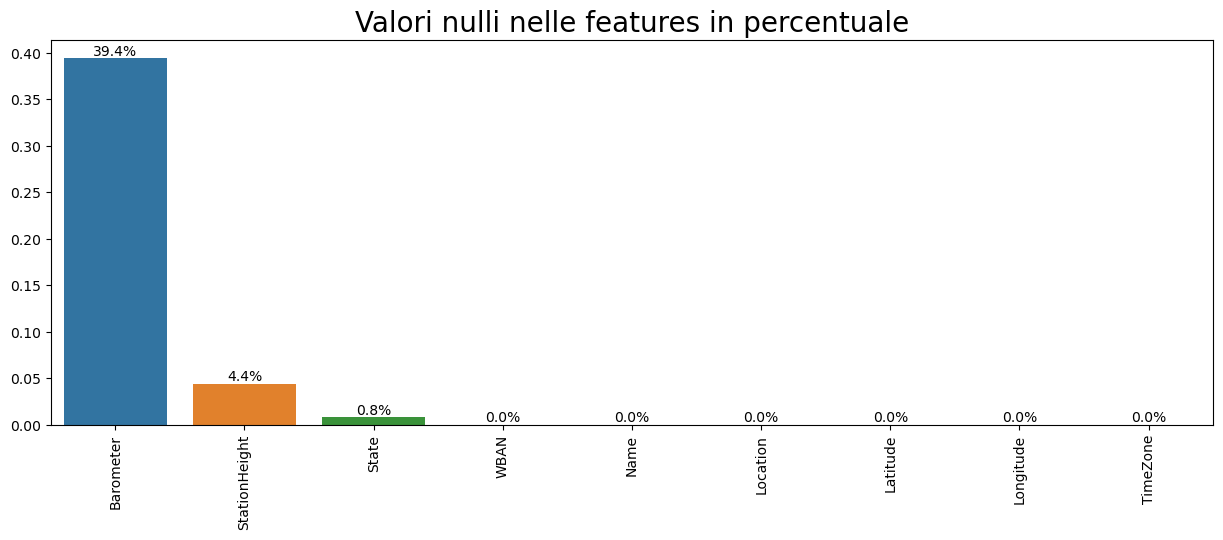

In [7]:
plt.figure(figsize=(15,5))
s = pd.Series(df_stations.isnull().sum()/df_stations.shape[0]).sort_values(ascending=False)
ax = sns.barplot(x = s.index, y = s.values)
plt.xticks(rotation=90)
plt.title("Valori nulli nelle features in percentuale", size=20)

for i, v in enumerate(s.values):
    ax.text(i, v, f"{v:.1%}", ha='center', va='bottom')

plt.show()

In [10]:
dfCorr = df_stations.copy()

columns_float = ['WBAN','Latitude', 'Longitude', 
       'StationHeight', 'Barometer', 'TimeZone']

dfCorr[columns_float] = dfCorr[columns_float].astype(float)

C:\Users\fulvi\AppData\Local\Temp\ipykernel_22228\1127422132.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fig = sns.heatmap(dfCorr.corr(), annot=True)


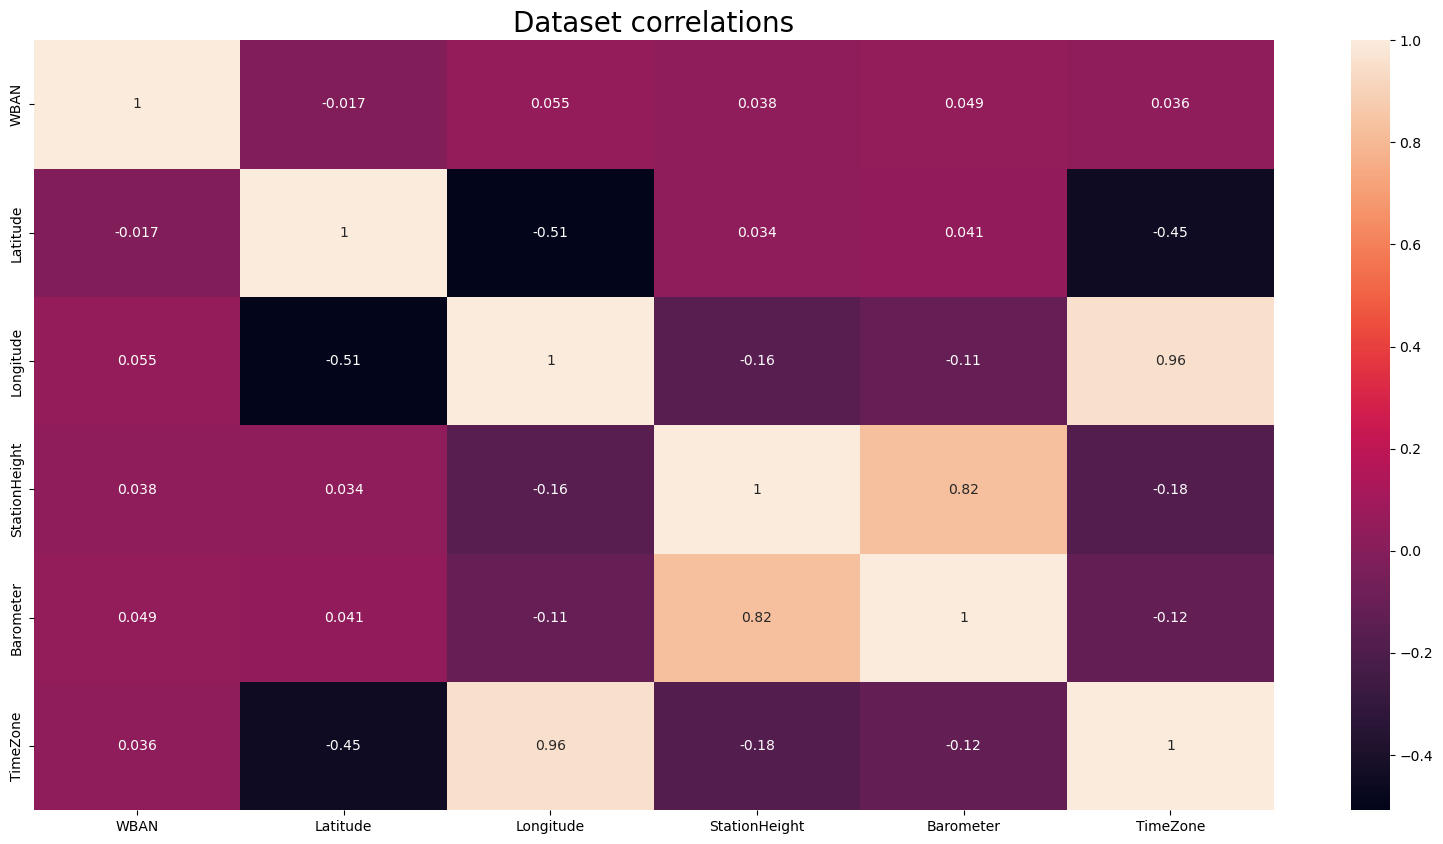

In [11]:
fig,ax = plt.subplots(figsize=(20,10))
fig = sns.heatmap(dfCorr.corr(), annot=True)
plt.title("Dataset correlations", size=20)
plt.show()

In [12]:
file = "201301stationM.csv"
df_stations.to_csv(path+file, index=False)

### PRECIP:

In [10]:
path = "assets/data/dataset_completo/QCLCD201301/"
file = "201301precip.txt"
df_precip = pd.read_csv(path+file, sep=",", )
df_precip.head()

,Wban,YearMonthDay,Hour,Precipitation,PrecipitationFlag
0,3011,20130101,1,,
1,3011,20130101,2,,
2,3011,20130101,3,,
3,3011,20130101,4,,
4,3011,20130101,5,,


In [11]:
df_precip.columns

Index(['Wban', 'YearMonthDay', 'Hour', 'Precipitation', 'PrecipitationFlag'], dtype='object')

In [12]:
columns = ['Wban', 'YearMonthDay', 'Hour', 'Precipitation']
columns_flag = ['PrecipitationFlag']     
df_precip[columns_flag] = df_precip[columns_flag].replace(['s', 'S'], np.nan)

In [13]:
print("Prima -->", df_precip.shape)
df_precip.dropna(subset=columns_flag, inplace=True)
df_precip = df_precip[columns]
print("Dopo -->", df_precip.shape)

Prima --> (1484280, 5)
Dopo --> (1483554, 4)


In [14]:
df_precip.replace('M', np.nan, inplace=True)
df_precip.replace('  T', 'T', inplace=True)
df_precip.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [15]:
def convert_integer_to_date(date_int):
    date_str = str(date_int)
    date_obj = datetime.strptime(date_str, '%Y%m%d')
    date_formatted = date_obj.strftime('%d/%m/%Y')
    return date_formatted

In [16]:
# Pollici to centimetri
condition = (df_precip['Precipitation'].str.strip() != 'T') & (df_precip['Precipitation'].notnull())
df_precip['Precipitation'] = np.where(condition, (pd.to_numeric(df_precip['Precipitation'], errors='coerce') * 2.54).round(2), df_precip['Precipitation'])

# int to data
df_precip['YearMonthDay'] = df_precip['YearMonthDay'].apply(convert_integer_to_date)

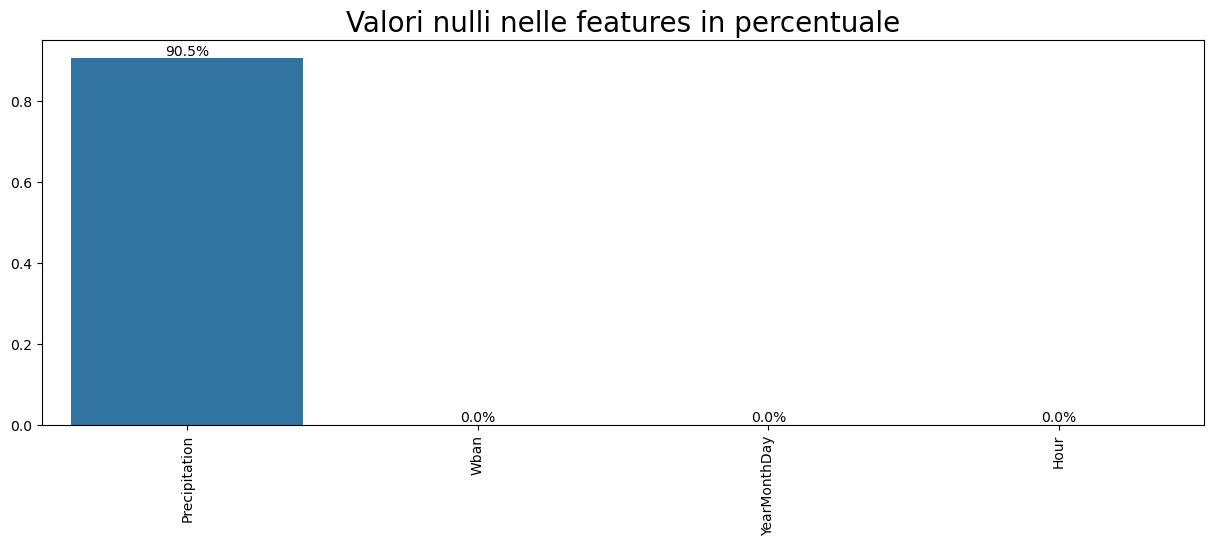

In [20]:
plt.figure(figsize=(15,5))
s = pd.Series(df_precip.isnull().sum()/df_precip.shape[0]).sort_values(ascending=False)
ax = sns.barplot(x = s.index, y = s.values)
plt.xticks(rotation=90)
plt.title("Valori nulli nelle features in percentuale", size=20)

for i, v in enumerate(s.values):
    ax.text(i, v, f"{v:.1%}", ha='center', va='bottom')

plt.show()

In [17]:
file = "201301precipM.csv"
df_precip.to_csv(path+file, index=False)

### Punti da chiarire per Precip:
1. quale è l'unità di misura di Precipitation? 
Attualmente da pollici a centimetri come per hourly. SI confermo POLLICI
2. Capire se è davvero utile questa tabella, visto che molti null sono presenti in precipitation

### REMARKS:

### MONTHLY:

In [22]:
file = "assets/data/dataset_completo/QCLCD201301/201301monthly.txt"
df_monthly = pd.read_csv(file, sep=",", )
print(df_monthly.shape)
df_monthly.head()

(1220, 50)


,WBAN,YearMonth,AvgMaxTemp,DepartureMaxTemp,AvgMinTemp,DepartureMinTemp,AvgTemp,DeparturefromNormal,AvgDewPoint,AvgWetBulb,...,HeavyFogDays,DaysWithPrecip>=.01inch,DaysWithPrecip>=.10inch,DaysWithSnowfall>=1.0inch,WaterEquivalent,ResultantWindSpeed,ResultantWindDirection,AvgWindSpeed,AvgHDD,AvgCDD
0,3013,201301,48.3,M,12.4,M,30.4,M,15.3,24.1,...,0,2,0,M,M,2.1,23,7.2,34.5,0.0
1,3016,201301,M,M,M,M,M,M,7.5,13.1,...,3,M,M,M,M,1.3,23,3.0,47.8,0.0
2,3017,201301,44.6,0.6,16.0,-1.4,30.3,-0.4,9.6,23.3,...,1,6,1,3,M,4.2,20,8.8,34.4,0.0
3,3024,201301,50.9,M,27.3,M,39.1,M,22.5,31.9,...,0,6,2,M,M,3.2,24,8.6,25.6,0.0
4,3026,201301,46.4,M,14.0,M,30.2,M,M,M,...,0,1,0,M,M,M,M,11.2,34.5,0.0


In [23]:
df_monthly.columns

Index(['WBAN', 'YearMonth', 'AvgMaxTemp', 'DepartureMaxTemp', 'AvgMinTemp',
       'DepartureMinTemp', 'AvgTemp', 'DeparturefromNormal', 'AvgDewPoint',
       'AvgWetBulb', 'HeatingDegreeDays', 'CoolingDegreeDays',
       'HDDMonthlyDeparture', 'CDDMonthlyDeparture', 'HDDSeasonToDate',
       'CDDSeasonToDate', 'HDDSeasonToDateDeparture',
       'CDDSeasonToDateDeparture', 'MeanStationPressure',
       'MeanSeaLevelPressure', 'MaxSeaLevelPressure',
       'DateMaxSeaLevelPressure', 'TimeMaxSeaLevelPressure',
       'MinSeaLevelPressure', 'DateMinSeaLevelPressure',
       'TimeMinSeaLevelPressure', 'TotalMonthlyPrecip',
       'DepartureFromNormalPrecip', 'Max24HrPrecip', 'DateMax24HrPrecip',
       'TotalSnowfall', 'Max24HrSnowfall', 'DateMax24HrSnowfall',
       'Max12ZSnowDepth', 'DateMax12ZSnowDepth', 'MaxTemp>=90Days',
       'MaxTemp<=32Days', 'MinTemp<=32Days', 'MinTemp<=0Days',
       'ThunderstormDays', 'HeavyFogDays', 'DaysWithPrecip>=.01inch',
       'DaysWithPrecip>=.10inch'

In [24]:
columns = ['WBAN', 'YearMonth', 'AvgMaxTemp', 'DepartureMaxTemp', 'AvgMinTemp',
       'DepartureMinTemp', 'AvgTemp', 'DeparturefromNormal',
       'MeanStationPressure',
       'MeanSeaLevelPressure', 'MaxSeaLevelPressure',
       'DateMaxSeaLevelPressure', 'TimeMaxSeaLevelPressure',
       'MinSeaLevelPressure', 'DateMinSeaLevelPressure',
       'TimeMinSeaLevelPressure', 'TotalMonthlyPrecip',
       'DepartureFromNormalPrecip', 'Max24HrPrecip', 'DateMax24HrPrecip',
       'TotalSnowfall', 'Max24HrSnowfall', 'DateMax24HrSnowfall',
       'Max12ZSnowDepth', 'DateMax12ZSnowDepth', 'MaxTemp>=90Days',
       'MaxTemp<=32Days', 'MinTemp<=32Days', 'MinTemp<=0Days',
       'ThunderstormDays', 'HeavyFogDays', 'DaysWithPrecip>=.01inch',
       'DaysWithPrecip>=.10inch', 'DaysWithSnowfall>=1.0inch',
       'ResultantWindSpeed', 'ResultantWindDirection',
       'AvgWindSpeed']

df_monthly = df_monthly[columns]

df_monthly.columns

Index(['WBAN', 'YearMonth', 'AvgMaxTemp', 'DepartureMaxTemp', 'AvgMinTemp',
       'DepartureMinTemp', 'AvgTemp', 'DeparturefromNormal',
       'MeanStationPressure', 'MeanSeaLevelPressure', 'MaxSeaLevelPressure',
       'DateMaxSeaLevelPressure', 'TimeMaxSeaLevelPressure',
       'MinSeaLevelPressure', 'DateMinSeaLevelPressure',
       'TimeMinSeaLevelPressure', 'TotalMonthlyPrecip',
       'DepartureFromNormalPrecip', 'Max24HrPrecip', 'DateMax24HrPrecip',
       'TotalSnowfall', 'Max24HrSnowfall', 'DateMax24HrSnowfall',
       'Max12ZSnowDepth', 'DateMax12ZSnowDepth', 'MaxTemp>=90Days',
       'MaxTemp<=32Days', 'MinTemp<=32Days', 'MinTemp<=0Days',
       'ThunderstormDays', 'HeavyFogDays', 'DaysWithPrecip>=.01inch',
       'DaysWithPrecip>=.10inch', 'DaysWithSnowfall>=1.0inch',
       'ResultantWindSpeed', 'ResultantWindDirection', 'AvgWindSpeed'],
      dtype='object')

In [25]:
df_monthly.replace('M', np.nan, inplace=True)
df_monthly.replace('  T', 'T', inplace=True)

df_monthly.head()

,WBAN,YearMonth,AvgMaxTemp,DepartureMaxTemp,AvgMinTemp,DepartureMinTemp,AvgTemp,DeparturefromNormal,MeanStationPressure,MeanSeaLevelPressure,...,MinTemp<=32Days,MinTemp<=0Days,ThunderstormDays,HeavyFogDays,DaysWithPrecip>=.01inch,DaysWithPrecip>=.10inch,DaysWithSnowfall>=1.0inch,ResultantWindSpeed,ResultantWindDirection,AvgWindSpeed
0,3013,201301,48.3,NaN,12.4,NaN,30.4,NaN,26.24,30.11,...,31,4,0,0,2,0,NaN,2.1,23,7.2
1,3016,201301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,3,NaN,NaN,NaN,1.3,23,3.0
2,3017,201301,44.6,0.6,16.0,-1.4,30.3,-0.4,24.57,30.05,...,30,5,0,1,6,1,3,4.2,20,8.8
3,3024,201301,50.9,NaN,27.3,NaN,39.1,NaN,26.93,30.13,...,23,0,0,0,6,2,NaN,3.2,24,8.6
4,3026,201301,46.4,NaN,14.0,NaN,30.2,NaN,25.74,30.10,...,31,3,0,0,1,0,NaN,NaN,NaN,11.2


### DAILY:

In [26]:
path = "assets/data/dataset_completo/QCLCD201301/"
file = "201301daily.txt"
df_daily = pd.read_csv(path+file, sep=",", )
print(df_daily.shape)
df_daily.head()

(37820, 50)


,WBAN,YearMonthDay,Tmax,TmaxFlag,Tmin,TminFlag,Tavg,TavgFlag,Depart,DepartFlag,...,AvgSpeed,AvgSpeedFlag,Max5Speed,Max5SpeedFlag,Max5Dir,Max5DirFlag,Max2Speed,Max2SpeedFlag,Max2Dir,Max2DirFlag
0,3013,20130101,26,,1,,14,,M,,...,7.1,,15,,280,,13,,200,
1,3013,20130102,36,,3,,20,,M,,...,8.0,,21,,350,,18,,350,
2,3013,20130103,36,,0,,18,,M,,...,6.7,,23,,220,,14,,170,
3,3013,20130104,39,,-2,,19,,M,,...,5.3,,17,,240,,15,,210,
4,3013,20130105,46,,0,,23,,M,,...,7.8,,22,,350,,18,,360,


In [27]:
df_daily.columns

Index(['WBAN', 'YearMonthDay', 'Tmax', 'TmaxFlag', 'Tmin', 'TminFlag', 'Tavg',
       'TavgFlag', 'Depart', 'DepartFlag', 'DewPoint', 'DewPointFlag',
       'WetBulb', 'WetBulbFlag', 'Heat', 'HeatFlag', 'Cool', 'CoolFlag',
       'Sunrise', 'SunriseFlag', 'Sunset', 'SunsetFlag', 'CodeSum',
       'CodeSumFlag', 'Depth', 'DepthFlag', 'Water1', 'Water1Flag', 'SnowFall',
       'SnowFallFlag', 'PrecipTotal', 'PrecipTotalFlag', 'StnPressure',
       'StnPressureFlag', 'SeaLevel', 'SeaLevelFlag', 'ResultSpeed',
       'ResultSpeedFlag', 'ResultDir', 'ResultDirFlag', 'AvgSpeed',
       'AvgSpeedFlag', 'Max5Speed', 'Max5SpeedFlag', 'Max5Dir', 'Max5DirFlag',
       'Max2Speed', 'Max2SpeedFlag', 'Max2Dir', 'Max2DirFlag'],
      dtype='object')

Si sostituiscono tutti i valori 's' (misura errata) negli attributi flag con np.nan:

In [28]:
columns = ['WBAN', 'YearMonthDay', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint', 
           'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth', 
           'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel', 
           'ResultDir', 'AvgSpeed']
columns_flag = ['TmaxFlag', 'TminFlag', 'TavgFlag', 'DepartFlag', 'DewPointFlag', 
                'WetBulbFlag','HeatFlag', 'CoolFlag', 'SunriseFlag','SunsetFlag', 
                'CodeSumFlag', 'DepthFlag', 'Water1Flag', 'SnowFallFlag', 'PrecipTotalFlag', 
                'StnPressureFlag', 'SeaLevelFlag','ResultSpeedFlag', 'ResultDirFlag', 
                'AvgSpeedFlag','Max5SpeedFlag', 'Max5DirFlag', 'Max2SpeedFlag', 'Max2DirFlag']       
df_daily[columns_flag] = df_daily[columns_flag].replace(['s', 'S'], np.nan)

Si rimuovono tutte le righe del dataframe che contengono almeno un np.nan, in questo modo vengono rimosse tutte le righe in cui sono stati presenti errori di misurazione:

In [29]:
print("Prima -->", df_daily.shape)
df_daily.dropna(subset=columns_flag, inplace=True)
df_daily = df_daily[columns]
print("Dopo -->", df_daily.shape)

Prima --> (37820, 50)
Dopo --> (33645, 20)


Tale dataset ripulito contiene ulteriori valori vuoti denotati dalla lettera 'M' (tranne nel caso degli attributi *Sunrise* e *Sunset* che presentano il valore '-' come campo vuoto). Per tale ragione verrano ancora una volta sostituiti con np.nan e verrà mostrato il grafico in percentuale dei valori nulli presenti nel dataset:

In [30]:
df_daily.replace('M', np.nan, inplace=True)
df_daily.replace('  T', 'T', inplace=True)
df_daily['Sunrise'].replace('-', np.nan, inplace=True)
df_daily['Sunset'].replace('-', np.nan, inplace=True)
# df_daily['CodeSum'].replace(' ', np.nan, inplace=True)
df_daily.replace(r'^\s*$', np.nan, regex=True, inplace=True)

Prossimo step è quello di effettuare le conversioni delle unità di misura:

In [31]:
def convert_gradi(dir_gradi):
    try:
        gradi = int(dir_gradi)
        return gradi*10
    except ValueError:
        return dir_gradi

def convert_mph_to_kmph(speed_mph):
    try:
        speed_mph = float(speed_mph)
        speed_kmph = speed_mph * 1.60934
        return round(speed_kmph, 2)
    except ValueError:
        return speed_mph

def convert_integer_to_date(date_int):
    date_str = str(date_int)
    date_obj = datetime.strptime(date_str, '%Y%m%d')
    date_formatted = date_obj.strftime('%d/%m/%Y')
    return date_formatted

def convert_time_string(time_string):
    try:
        hour = int(time_string[:2])
        min = int(time_string[2:])
        hour += min//60
        min = min%60
        ts = str(hour).zfill(2) + str(min).zfill(2)
        time = datetime.strptime(ts, '%H%M').time().strftime('%H:%M')
        return time
    except (TypeError, ValueError):
        return time_string    

In [32]:
# Fharenheit to Celsius
df_daily['Tmax'] = np.where(df_daily['Tmax'].notnull(), ((df_daily['Tmax'].astype(float) - 32) * 5/9).round(2), df_daily['Tmax'].astype(float))
df_daily['Tmin'] = np.where(df_daily['Tmin'].notnull(), ((df_daily['Tmin'].astype(float) - 32) * 5/9).round(2), df_daily['Tmin'].astype(float))
df_daily['Tavg'] = np.where(df_daily['Tavg'].notnull(), ((df_daily['Tavg'].astype(float) - 32) * 5/9).round(2), df_daily['Tavg'].astype(float))
df_daily['Depart'] = np.where(df_daily['Depart'].notnull(), ((df_daily['Depart'].astype(float) - 32) * 5/9).round(2), df_daily['Depart'].astype(float))
df_daily['DewPoint'] = np.where(df_daily['DewPoint'].notnull(), ((df_daily['DewPoint'].astype(float) - 32) * 5/9).round(2), df_daily['DewPoint'].astype(float))
df_daily['WetBulb'] = np.where(df_daily['WetBulb'].notnull(), ((df_daily['WetBulb'].astype(float) - 32) * 5/9).round(2), df_daily['WetBulb'].astype(float))
df_daily['Heat'] = np.where(df_daily['Heat'].notnull(), ((df_daily['Heat'].astype(float) - 32) * 5/9).round(2), df_daily['Heat'].astype(float))
df_daily['Cool'] = np.where(df_daily['Cool'].notnull(), ((df_daily['Cool'].astype(float) - 32) * 5/9).round(2), df_daily['Cool'].astype(float))

# Pollici to centimetri
condition1 = (df_daily['SnowFall'].str.strip() != 'T') & (df_daily['SnowFall'].notnull())
condition2 = (df_daily['Depth'].str.strip() != 'T') & (df_daily['Depth'].notnull())
condition3 = (df_daily['PrecipTotal'].str.strip() != 'T') & (df_daily['PrecipTotal'].notnull())
df_daily['SnowFall'] = np.where(condition1, (pd.to_numeric(df_daily['SnowFall'], errors='coerce') * 2.54).round(2), df_daily['SnowFall'])
df_daily['Depth'] = np.where(condition2, (pd.to_numeric(df_daily['Depth'], errors='coerce') * 2.54).round(2), df_daily['Depth'])
df_daily['PrecipTotal'] = np.where(condition3, (pd.to_numeric(df_daily['PrecipTotal'], errors='coerce') * 2.54).round(2), df_daily['PrecipTotal'])

# hg to hPa
df_daily['StnPressure'] = np.where(df_daily['StnPressure'].notnull(), (df_daily['StnPressure'].astype(float) * 33.8639).round(2), df_daily['StnPressure'].astype(float))
df_daily['SeaLevel'] = np.where(df_daily['SeaLevel'].notnull(), (df_daily['SeaLevel'].astype(float) * 33.8639).round(2), df_daily['SeaLevel'].astype(float))

# gradi*10
df_daily['ResultDir'] = df_daily['ResultDir'].apply(convert_gradi)

# mph to kmph
df_daily['AvgSpeed'] = df_daily['AvgSpeed'].apply(convert_mph_to_kmph)

# int to data
df_daily['YearMonthDay'] = df_daily['YearMonthDay'].apply(convert_integer_to_date)

# string to time
df_daily['Sunrise'] = df_daily['Sunrise'].apply(convert_time_string)
df_daily['Sunset'] = df_daily['Sunset'].apply(convert_time_string)

Da notare che adesso il dataset finale conterrà dei valori Nan, che corrispondono all'assenza del valore, mentre valori 'T' corrispondono ad una misurazione effettuata però che è ininfliuente per lo scopo di quella misura (ad esempio per quanto riguarda l'attributo 'SnowFall' significa che la neve è presente ma l'altezza è irrilevante perchè troppo bassa)

Viene mostrato il grafico dei valori null in percentuale del dataset ripulito:

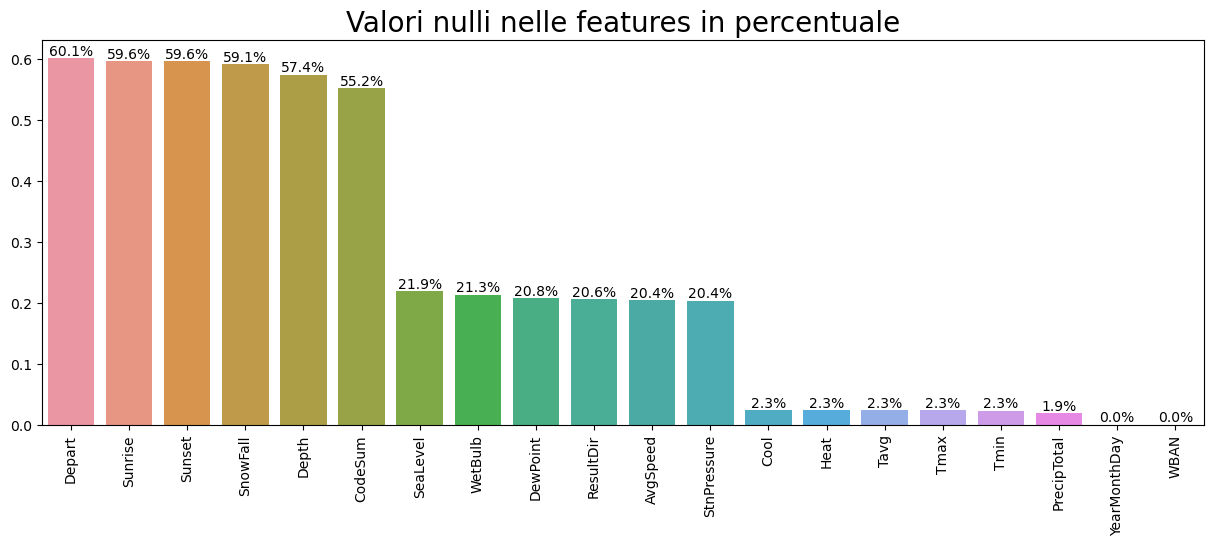

In [33]:
plt.figure(figsize=(15,5))
s = pd.Series(df_daily.isnull().sum()/df_daily.shape[0]).sort_values(ascending=False)
ax = sns.barplot(x = s.index, y = s.values)
plt.xticks(rotation=90)
plt.title("Valori nulli nelle features in percentuale", size=20)

for i, v in enumerate(s.values):
    ax.text(i, v, f"{v:.1%}", ha='center', va='bottom')

plt.show()

Per quanto riguarda gli attributi 'Depth', 'SnowFall' e 'PrecipTotal', si è notato che i calori mancanti e i valori di tipo 'T' possono essere sostituiti con il valore 0. Proprio perchè essi dichiarano l'assenza di quella caratteristica:

In [34]:
df_daily[['Depth', 'SnowFall', 'PrecipTotal']] = df_daily[['Depth', 'SnowFall', 'PrecipTotal']].fillna(0)
df_daily[['Depth', 'SnowFall', 'PrecipTotal']] = df_daily[['Depth', 'SnowFall', 'PrecipTotal']].replace('T', 0)

Per quanto riguarda gli attributi 'Tax', 'Tmin' e 'Tavg' si potrebbe adottare una tecnica di interpolazione lineare tra il primo valore di temperatura non nullo nel giorno più recente di quella stazione e il primo valore di temperatura non nullo dopo la sequenza di valori nulli: es. [10, **nan**, **nan**, **nan**, 14, 12] --> [10, **11**, **12**, **13**, 14, 12].

Restano comuque dei valori nulli nelle temperature, ovvero tutti quelli in cui il valore di temperatura del primo giorno del mese è nullo.

In [35]:
df_daily.sort_values(['WBAN', 'YearMonthDay'], inplace=True)
df_daily['Tmax'] = df_daily.groupby('WBAN')['Tmax'].apply(lambda x: x.interpolate())
df_daily['Tmin'] = df_daily.groupby('WBAN')['Tmin'].apply(lambda x: x.interpolate())
df_daily['Tavg'] = df_daily.groupby('WBAN')['Tavg'].apply(lambda x: x.interpolate())

C:\Users\fulvi\AppData\Local\Temp\ipykernel_22228\3866134285.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_daily['Tmax'] = df_daily.groupby('WBAN')['Tmax'].apply(lambda x: x.interpolate())
C:\Users\fulvi\AppData\Local\Temp\ipykernel_22228\3866134285.py:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., grou

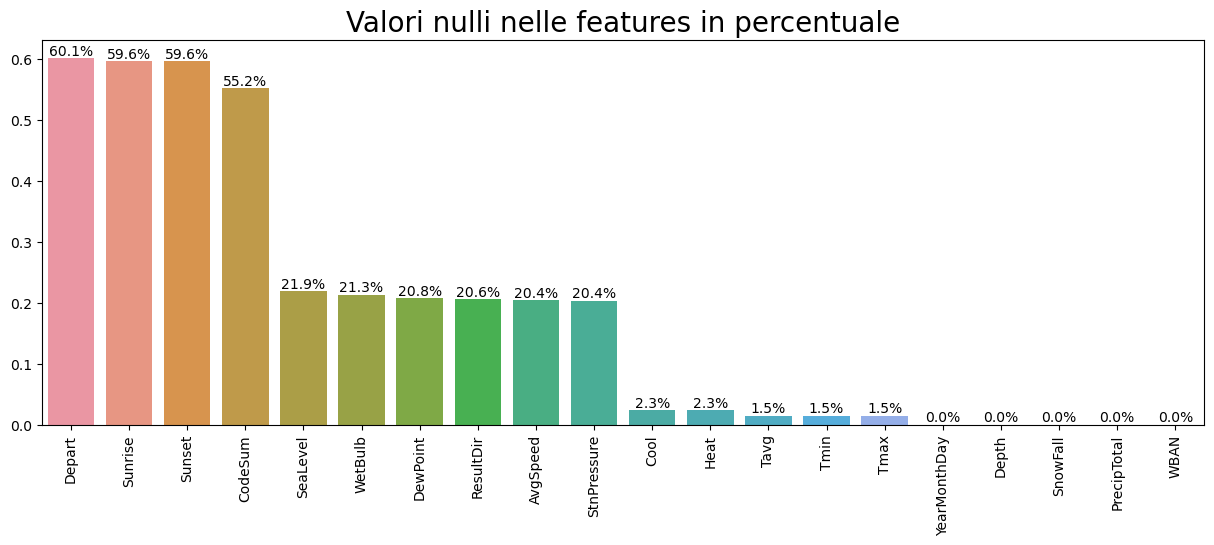

In [36]:
plt.figure(figsize=(15,5))
s = pd.Series(df_daily.isnull().sum()/df_daily.shape[0]).sort_values(ascending=False)
ax = sns.barplot(x = s.index, y = s.values)
plt.xticks(rotation=90)
plt.title("Valori nulli nelle features in percentuale", size=20)

for i, v in enumerate(s.values):
    ax.text(i, v, f"{v:.1%}", ha='center', va='bottom')

plt.show()

Adesso viene mostrata la matrice di correlazione tra gli attributi:

In [37]:
dfCorr = df_daily.copy()
# sostituisco per il momento 'T' con nan altrimenti quando vado a convertire il tipo in float mi dà problemi essendo 'T' un carattere
dfCorr.replace('T', np.nan, inplace=True)

columns_float = ['WBAN', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint', 
           'WetBulb', 'Heat', 'Cool', 'Depth', 
           'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel', 
           'ResultDir', 'AvgSpeed']

dfCorr[columns_float] = dfCorr[columns_float].astype(float)

C:\Users\fulvi\AppData\Local\Temp\ipykernel_22228\1127422132.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fig = sns.heatmap(dfCorr.corr(), annot=True)


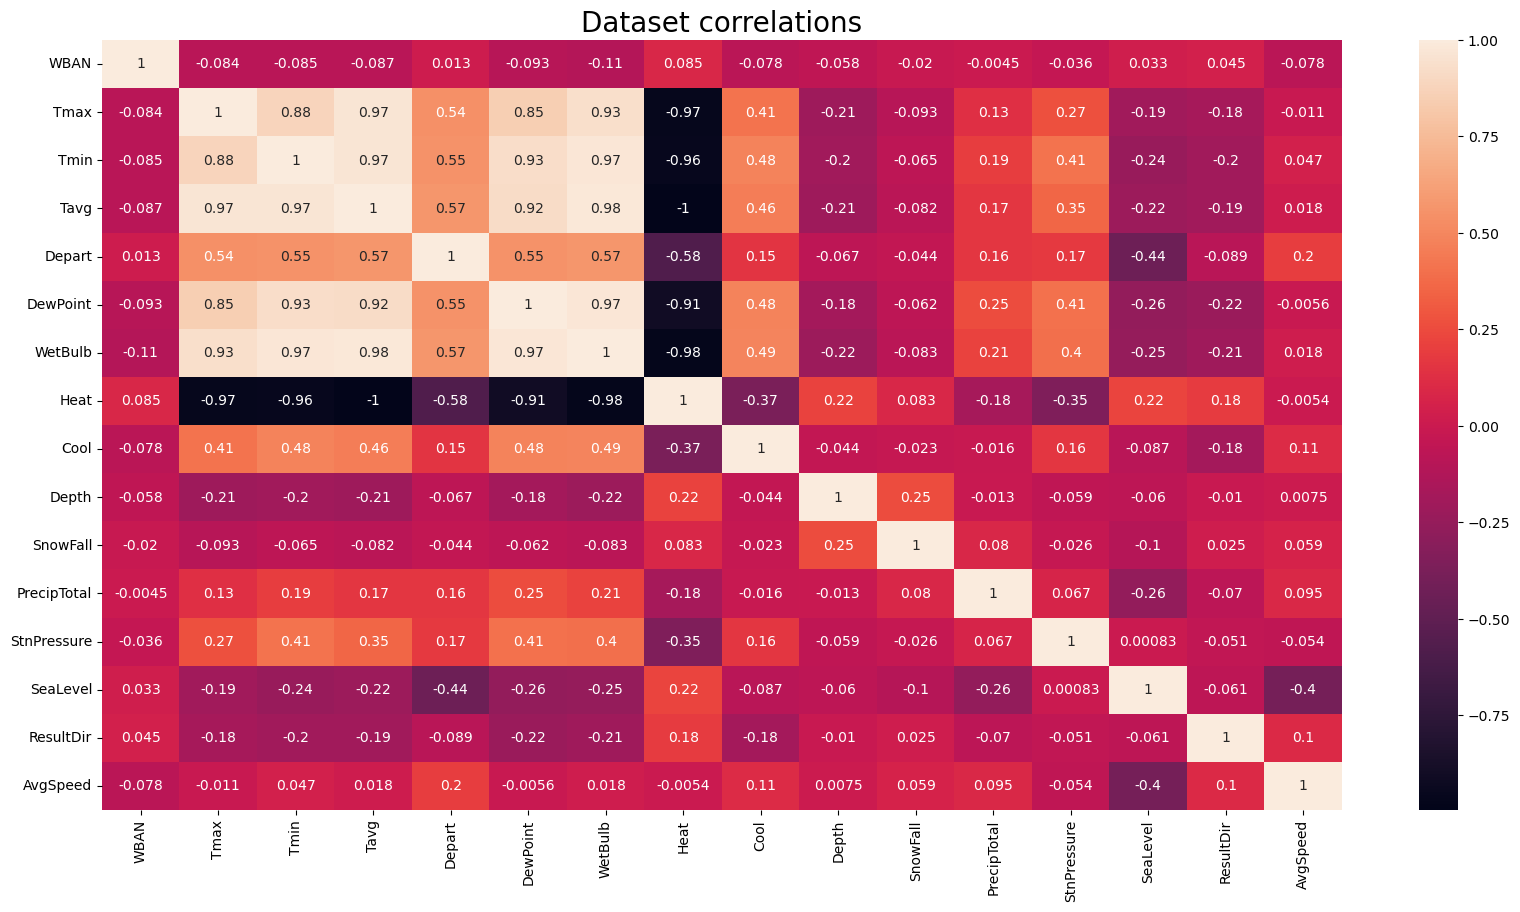

In [38]:
fig,ax = plt.subplots(figsize=(20,10))
fig = sns.heatmap(dfCorr.corr(), annot=True)
plt.title("Dataset correlations", size=20)
plt.show()

Il dataframe 'df_daily' corrisponde al dataset ripulito, verrà salvato come il nuovo dataset .csv:

In [39]:
file = "201301dailyM.csv"
df_daily.to_csv(path+file, index=False)

### HOURLY:

In [18]:
path = "assets/data/dataset_completo/QCLCD201301/"
file = "201301hourly.txt"
df_hourly = pd.read_csv(path+file, sep=",", )
print(df_hourly.shape)
df_hourly.head()

C:\Users\fulvi\AppData\Local\Temp\ipykernel_23788\3183697864.py:3: DtypeWarning: Columns (10,12,24,26,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df_hourly = pd.read_csv(path+file, sep=",", )


(4239890, 44)


,WBAN,Date,Time,StationType,SkyCondition,SkyConditionFlag,Visibility,VisibilityFlag,WeatherType,WeatherTypeFlag,...,PressureChange,PressureChangeFlag,SeaLevelPressure,SeaLevelPressureFlag,RecordType,RecordTypeFlag,HourlyPrecip,HourlyPrecipFlag,Altimeter,AltimeterFlag
0,3011,20130101,0,0,OVC,,5.00,,,,...,,,M,,AA,,,,29.93,
1,3011,20130101,15,0,SCT011 SCT020,,7.00,,-SN,,...,,,M,,AA,,,,29.93,
2,3011,20130101,35,0,CLR,,10.00,,,,...,,,M,,AA,,,,29.93,
3,3011,20130101,55,0,CLR,,10.00,,,,...,,,M,,AA,,,,29.93,
4,3011,20130101,115,0,CLR,,10.00,,,,...,,,M,,AA,,,,29.93,


In [19]:
df_hourly.columns

Index(['WBAN', 'Date', 'Time', 'StationType', 'SkyCondition',
       'SkyConditionFlag', 'Visibility', 'VisibilityFlag', 'WeatherType',
       'WeatherTypeFlag', 'DryBulbFarenheit', 'DryBulbFarenheitFlag',
       'DryBulbCelsius', 'DryBulbCelsiusFlag', 'WetBulbFarenheit',
       'WetBulbFarenheitFlag', 'WetBulbCelsius', 'WetBulbCelsiusFlag',
       'DewPointFarenheit', 'DewPointFarenheitFlag', 'DewPointCelsius',
       'DewPointCelsiusFlag', 'RelativeHumidity', 'RelativeHumidityFlag',
       'WindSpeed', 'WindSpeedFlag', 'WindDirection', 'WindDirectionFlag',
       'ValueForWindCharacter', 'ValueForWindCharacterFlag', 'StationPressure',
       'StationPressureFlag', 'PressureTendency', 'PressureTendencyFlag',
       'PressureChange', 'PressureChangeFlag', 'SeaLevelPressure',
       'SeaLevelPressureFlag', 'RecordType', 'RecordTypeFlag', 'HourlyPrecip',
       'HourlyPrecipFlag', 'Altimeter', 'AltimeterFlag'],
      dtype='object')

Si sostituiscono tutti i valori 's' (misura errata) negli attributi flag con np.nan:

In [20]:
# columns = ['WBAN', 'Date', 'Time', 'StationType', 'SkyCondition', 'Visibility', 'WeatherType', 
#            'DryBulbCelsius', 'WetBulbCelsius', 'DewPointCelsius', 'RelativeHumidity', 'WindSpeed', 'WindDirection', 'ValueForWindCharacter', 
#            'StationPressure', 'PressureTendency', 'PressureChange', 'SeaLevelPressure', 'RecordType', 
#            'HourlyPrecip', 'Altimeter']
columns = ['WBAN', 'Date', 'Time', 'SkyCondition', 'Visibility', 'WeatherType', 
           'DryBulbCelsius', 'WetBulbCelsius', 'DewPointCelsius', 'RelativeHumidity', 'WindSpeed', 'WindDirection', 
           'StationPressure', 'SeaLevelPressure', 'HourlyPrecip', 'Altimeter']
columns_flag = ['SkyConditionFlag', 'VisibilityFlag', 'WeatherTypeFlag', 'DryBulbCelsiusFlag', 'WetBulbCelsiusFlag', 
                'DewPointCelsiusFlag','RelativeHumidityFlag', 'WindSpeedFlag', 'WindDirectionFlag','ValueForWindCharacterFlag', 
                'StationPressureFlag', 'PressureTendencyFlag', 'PressureChangeFlag', 'SeaLevelPressureFlag', 'RecordTypeFlag', 
                'HourlyPrecipFlag', 'AltimeterFlag']       
df_hourly[columns_flag] = df_hourly[columns_flag].replace(['s', 'S'], np.nan)

Si rimuovono tutte le righe del dataframe che contengono almeno un np.nan, in questo modo vengono rimosse tutte le righe in cui sono stati presenti errori di misurazione:

In [21]:
print("Prima -->", df_hourly.shape)
df_hourly.dropna(subset=columns_flag, inplace=True)
df_hourly = df_hourly[columns]
print("Dopo -->", df_hourly.shape)

Prima --> (4239890, 44)
Dopo --> (4214847, 16)


Tale dataset ripulito contiene ulteriori valori vuoti denotati dalla lettera 'M'. Per tale ragione verrano ancora una volta sostituiti con np.nan e verrà mostrato il grafico in percentuale dei valori nulli presenti nel dataset:

In [22]:
df_hourly.replace('M', np.nan, inplace=True)
df_hourly.replace(r'^\s*$', np.nan, regex=True, inplace=True)
# df_hourly.replace('  ', np.nan, inplace=True)
df_hourly.replace('VR ', np.nan, inplace=True)
# df_hourly.replace('   ', np.nan, inplace=True)
df_hourly.replace('  T', 'T', inplace=True)

Prossimo step è quello di convertire i valori di temperatura da fahremheit in celsius, i pollici in centimetri e la pressione da hg in hPa:

In [44]:
columns = ['WBAN', 'Date', 'Time', 'SkyCondition', 'Visibility', 'WeatherType', 
           'DryBulbCelsius', 'WetBulbCelsius', 'DewPointCelsius', 'RelativeHumidity', 'WindSpeed', 'WindDirection', 
           'StationPressure', 'SeaLevelPressure', 'HourlyPrecip', 'Altimeter']
columns2 = ['WBAN', 'Date', 'Time', 'SkyCondition', 'Visibility', 'WeatherType', 
           'DryBulbCelsius', 'WetBulbCelsius', 'DewPointCelsius', 'RelativeHumidity', 'WindSpeed', 'WindDirection', 'ValueForWindCharacter', 
           'StationPressure', 'PressureTendency', 'PressureChange', 'SeaLevelPressure', 'RecordType', 
           'HourlyPrecip', 'Altimeter']
i=15
print(columns[i])
print(len(df_hourly[columns[i]].unique()))
df_hourly[columns[i]].unique()

Altimeter
455


array(['29.93', '29.94', '29.95', '29.97', '29.96', '29.98', '29.99',
       '30.00', '30.01', '30.02', '30.03', '30.04', '30.05', '30.06',
       '30.07', '30.08', '30.09', '30.10', '30.11', '30.12', '30.13',
       '30.14', '30.15', '30.16', '30.17', '30.19', '30.20', '30.21',
       '30.22', '30.18', '30.23', '30.24', '30.25', '30.26', '30.27',
       '30.29', '30.28', '30.30', '30.31', nan, '30.33', '30.35', '30.36',
       '30.37', '30.38', '30.34', '30.32', '29.92', '29.91', '29.89',
       '29.87', '29.86', '29.85', '29.84', '29.82', '29.83', '29.80',
       '29.81', '29.79', '29.78', '29.77', '29.75', '29.73', '29.70',
       '29.68', '29.66', '29.64', '29.63', '29.62', '29.61', '29.59',
       '29.58', '29.56', '29.54', '29.51', '29.49', '29.47', '29.46',
       '29.40', '29.41', '29.43', '29.42', '29.44', '29.45', '29.48',
       '29.50', '29.53', '29.55', '29.57', '29.60', '29.65', '29.67',
       '29.69', '29.71', '29.72', '29.74', '29.76', '29.88', '29.90',
       '30.39',

In [52]:
def convert_mph_to_kmph(speed_mph):
    try:
        speed_mph = float(speed_mph)
        speed_kmph = speed_mph * 1.60934
        return round(speed_kmph, 2)
    except ValueError:
        return speed_mph

def convert_integer_to_date(date_int):
    date_str = str(date_int)
    date_obj = datetime.strptime(date_str, '%Y%m%d')
    date_formatted = date_obj.strftime('%d/%m/%Y')
    return date_formatted

def convert_time_int(time_int):
    time_string = str(time_int).zfill(4)
    return datetime.strptime(time_string, '%H%M').time().strftime('%H:%M')

# Funzione per la conversione della visibilità da miglia a chilometri
def convert_visibility_to_km(visibility):
    try:
        miles = float(visibility)#.strip())
        km = miles * 1.60934
        return round(km, 2)
    except ValueError:
        print("ERRORE")
        return visibility

In [46]:
# Celsius in float
df_hourly['DryBulbCelsius'] = df_hourly['DryBulbCelsius'].astype(float)
df_hourly['WetBulbCelsius'] = df_hourly['WetBulbCelsius'].astype(float)
df_hourly['DewPointCelsius'] = df_hourly['DewPointCelsius'].astype(float)
df_hourly['RelativeHumidity'] = df_hourly['RelativeHumidity'].astype(float)
df_hourly['WindDirection'] = df_hourly['WindDirection'].astype(float)

# Pollici to centimetri
condition = (df_hourly['HourlyPrecip'].str.strip() != 'T') & (df_hourly['HourlyPrecip'].notnull())
df_hourly['HourlyPrecip'] = np.where(condition, (pd.to_numeric(df_hourly['HourlyPrecip'], errors='coerce') * 2.54).round(2), df_hourly['HourlyPrecip'])

# hg to hPa
df_hourly['StationPressure'] = np.where(df_hourly['StationPressure'].notnull(), (df_hourly['StationPressure'].astype(float) * 33.8639).round(2), df_hourly['StationPressure'].astype(float))
df_hourly['SeaLevelPressure'] = np.where(df_hourly['SeaLevelPressure'].notnull(), (df_hourly['SeaLevelPressure'].astype(float) * 33.8639).round(2), df_hourly['SeaLevelPressure'].astype(float))
df_hourly['Altimeter'] = np.where(df_hourly['Altimeter'].notnull(), (df_hourly['Altimeter'].astype(float) * 33.8639).round(2), df_hourly['Altimeter'].astype(float))

# mph to kmph
df_hourly['WindSpeed'] = df_hourly['WindSpeed'].apply(convert_mph_to_kmph)
df_hourly['Visibility'] = df_hourly['Visibility'].apply(convert_visibility_to_km)

# int to data
df_hourly['Date'] = df_hourly['Date'].apply(convert_integer_to_date)

# int to time
df_hourly['Time'] = df_hourly['Time'].apply(convert_time_int)

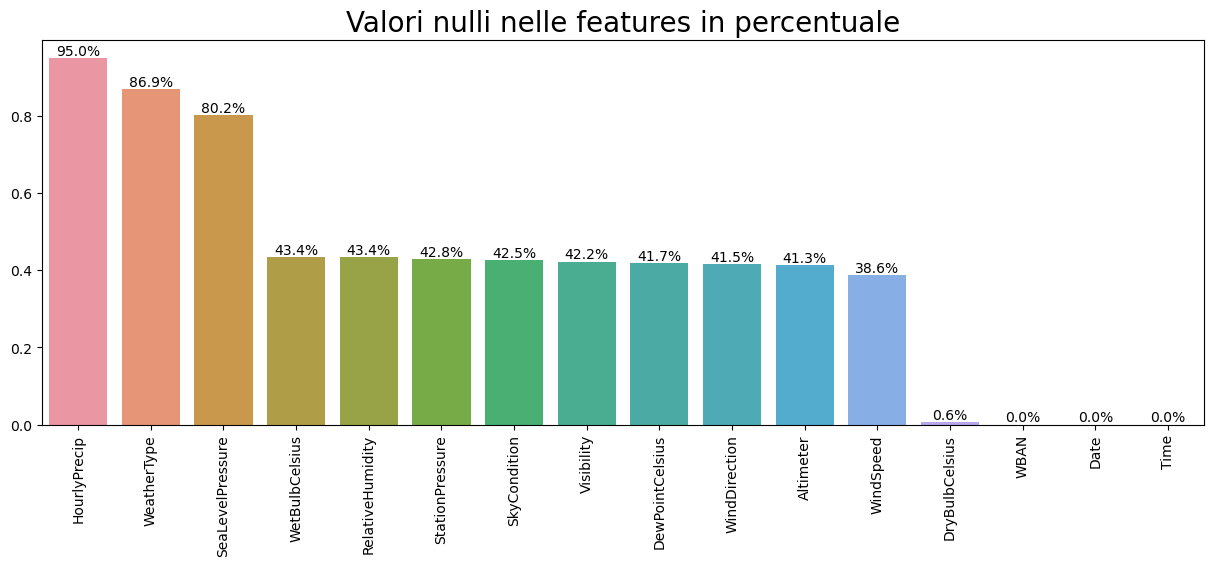

In [55]:
plt.figure(figsize=(15,5))
s = pd.Series(df_hourly.isnull().sum()/df_hourly.shape[0]).sort_values(ascending=False)
ax = sns.barplot(x = s.index, y = s.values)
plt.xticks(rotation=90)
plt.title("Valori nulli nelle features in percentuale", size=20)

for i, v in enumerate(s.values):
    ax.text(i, v, f"{v:.1%}", ha='center', va='bottom')

plt.show()

In [56]:
dfCorr = df_hourly.copy()
# sostituisco per il momento 'T' con nan altrimenti quando vado a convertire il tipo in float mi dà problemi essendo 'T' un carattere
dfCorr.replace('T', np.nan, inplace=True)

columns_float = ['WBAN', 'Visibility', 'DryBulbCelsius', 'WetBulbCelsius', 'DewPointCelsius', 'RelativeHumidity', 'WindSpeed', 'WindDirection', 
           'StationPressure', 'SeaLevelPressure', 'HourlyPrecip', 'Altimeter']

dfCorr[columns_float] = dfCorr[columns_float].astype(float)

C:\Users\fulvi\AppData\Local\Temp\ipykernel_22228\1127422132.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fig = sns.heatmap(dfCorr.corr(), annot=True)


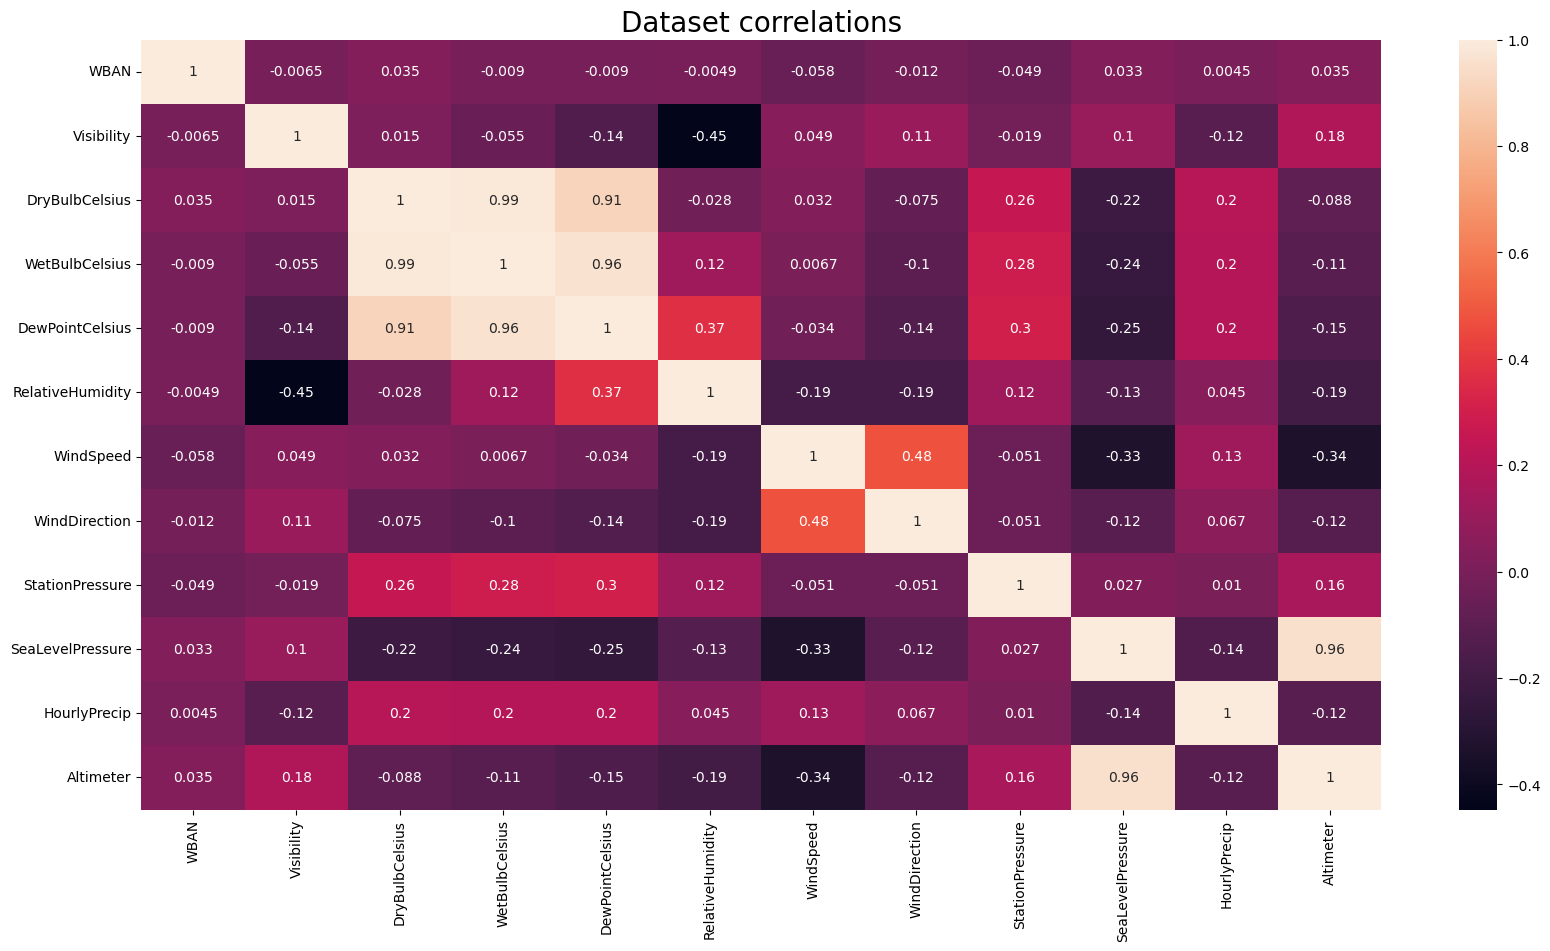

In [57]:
fig,ax = plt.subplots(figsize=(20,10))
fig = sns.heatmap(dfCorr.corr(), annot=True)
plt.title("Dataset correlations", size=20)
plt.show()

ATTENZIONE: 'Altimeter' e 'SeaLevelPressure' molto correlate, lasciamo solo 1 attributo dei due?

In [ ]:
file = "201301hourlyM.csv"
df_hourly.to_csv(path+file, index=False)

### Punti da chiarire per hourly:
1. quale è l'unità di misura della visibilità? Non penso miglia, valori troppo grandi altrimenti.
Attualmente lasciata la sua unità di misura originale.

2. Verificare anche le correlazioni, ci sono alcuni attributi molto correlati tra loro, si potrebbe eliminare qualche attributo.